In [45]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/anagh/Downloads/Crime_Boston.csv")

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192067438,613,Larceny,LARCENY SHOPLIFTING,A1,112,NaN,2019-08-25 19:55:02,2019,8,Sunday,19,Part One,WASHINGTON ST,42.355123,-71.060880,"(42.35512339, -71.06087980)"
1,I192067437,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A1,,NaN,2019-08-25 18:20:00,2019,8,Sunday,18,Part Three,NaN,42.352389,-71.062603,"(42.35238871, -71.06260312)"
2,I192067435,3115,Investigate Person,INVESTIGATE PERSON,C11,336,NaN,2019-08-25 20:45:00,2019,8,Sunday,20,Part Three,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
3,I192067434,3301,Verbal Disputes,VERBAL DISPUTE,E18,492,NaN,2019-08-25 20:32:00,2019,8,Sunday,20,Part Three,DERRY RD,42.265933,-71.113774,"(42.26593347, -71.11377415)"
4,I192067433,3301,Verbal Disputes,VERBAL DISPUTE,D14,769,NaN,2019-08-25 20:30:00,2019,8,Sunday,20,Part Three,PARSONS ST,NaN,NaN,"(0.00000000, 0.00000000)"


# Initial Exploration

In [6]:
#Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416133 entries, 0 to 416132
Data columns (total 17 columns):
INCIDENT_NUMBER        416133 non-null object
OFFENSE_CODE           416133 non-null int64
OFFENSE_CODE_GROUP     416133 non-null object
OFFENSE_DESCRIPTION    416133 non-null object
DISTRICT               413936 non-null object
REPORTING_AREA         416133 non-null object
SHOOTING               1717 non-null object
OCCURRED_ON_DATE       416133 non-null object
YEAR                   416133 non-null int64
MONTH                  416133 non-null int64
DAY_OF_WEEK            416133 non-null object
HOUR                   416133 non-null int64
UCR_PART               416024 non-null object
STREET                 403871 non-null object
Lat                    388926 non-null float64
Long                   388926 non-null float64
Location               416133 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 54.0+ MB


In [7]:
df.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
416128,I020691165-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
416129,I020674147-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
416130,I020669075-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
416131,I020662996-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:56:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
416132,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [8]:
df.duplicated().sum()

733

In [11]:
df.columns= map(str.lower, df.columns)

In [12]:
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'shooting',
       'occurred_on_date', 'year', 'month', 'day_of_week', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location'],
      dtype='object')

In [16]:
df['offense_code_group'].nunique()

67

There are 67 types of unique crime categories. Let us convert them to categories.

In [17]:
df['offense_code_group']= df['offense_code_group'].astype('category')

In [23]:
#Remove unwanted columns
#DROPPED all unnecessary columns

In [25]:
#df.drop('reporting_area', axis =1, inplace = True)

In [26]:
df.head()

,incident_number,offense_code_group,shooting,occurred_on_date,year,month,day_of_week,hour,street,lat,long,location
0,I192067438,Larceny,NaN,2019-08-25 19:55:02,2019,8,Sunday,19,WASHINGTON ST,42.355123,-71.060880,"(42.35512339, -71.06087980)"
1,I192067437,Motor Vehicle Accident Response,NaN,2019-08-25 18:20:00,2019,8,Sunday,18,NaN,42.352389,-71.062603,"(42.35238871, -71.06260312)"
2,I192067435,Investigate Person,NaN,2019-08-25 20:45:00,2019,8,Sunday,20,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
3,I192067434,Verbal Disputes,NaN,2019-08-25 20:32:00,2019,8,Sunday,20,DERRY RD,42.265933,-71.113774,"(42.26593347, -71.11377415)"
4,I192067433,Verbal Disputes,NaN,2019-08-25 20:30:00,2019,8,Sunday,20,PARSONS ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [ ]:
#Rename columns

In [29]:
df= df.rename(columns={'offense_code_group' :'offense_group', 'occurred_on_date' :'date_occurred'})

In [30]:
df.head()

,incident_number,offense_group,shooting,date_occurred,year,month,day_of_week,hour,street,lat,long,location
0,I192067438,Larceny,NaN,2019-08-25 19:55:02,2019,8,Sunday,19,WASHINGTON ST,42.355123,-71.060880,"(42.35512339, -71.06087980)"
1,I192067437,Motor Vehicle Accident Response,NaN,2019-08-25 18:20:00,2019,8,Sunday,18,NaN,42.352389,-71.062603,"(42.35238871, -71.06260312)"
2,I192067435,Investigate Person,NaN,2019-08-25 20:45:00,2019,8,Sunday,20,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
3,I192067434,Verbal Disputes,NaN,2019-08-25 20:32:00,2019,8,Sunday,20,DERRY RD,42.265933,-71.113774,"(42.26593347, -71.11377415)"
4,I192067433,Verbal Disputes,NaN,2019-08-25 20:30:00,2019,8,Sunday,20,PARSONS ST,NaN,NaN,"(0.00000000, 0.00000000)"


In [63]:
#Find the  counts of types of  offenses
df['offense_group'].value_counts()

Motor Vehicle Accident Response              48351
Larceny                                      33833
Medical Assistance                           31791
Investigate Person                           24309
Other                                        23421
Drug Violation                               21550
Simple Assault                               20766
Vandalism                                    19621
Verbal Disputes                              17331
Investigate Property                         14746
Towed                                        14538
Larceny From Motor Vehicle                   13590
Property Lost                                13082
Warrant Arrests                              10853
Aggravated Assault                           10368
Fraud                                         8031
Violations                                    7838
Missing Person Located                        7062
Residential Burglary                          6734
Auto Theft                     

Looks like the Motor vehicle accidents are the highest in number

In [33]:
df['date_occurred']= pd.to_datetime(df['date_occurred'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416133 entries, 0 to 416132
Data columns (total 12 columns):
incident_number    416133 non-null object
offense_group      416133 non-null category
shooting           1717 non-null object
date_occurred      416133 non-null datetime64[ns]
year               416133 non-null int64
month              416133 non-null int64
day_of_week        416133 non-null object
hour               416133 non-null int64
street             403871 non-null object
lat                388926 non-null float64
long               388926 non-null float64
location           416133 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 35.3+ MB


In [35]:
#Visualize the crimes distribution

array([2019, 2018, 2016, 2015, 2017], dtype=int64)

Text(0.5,0,'proportion')

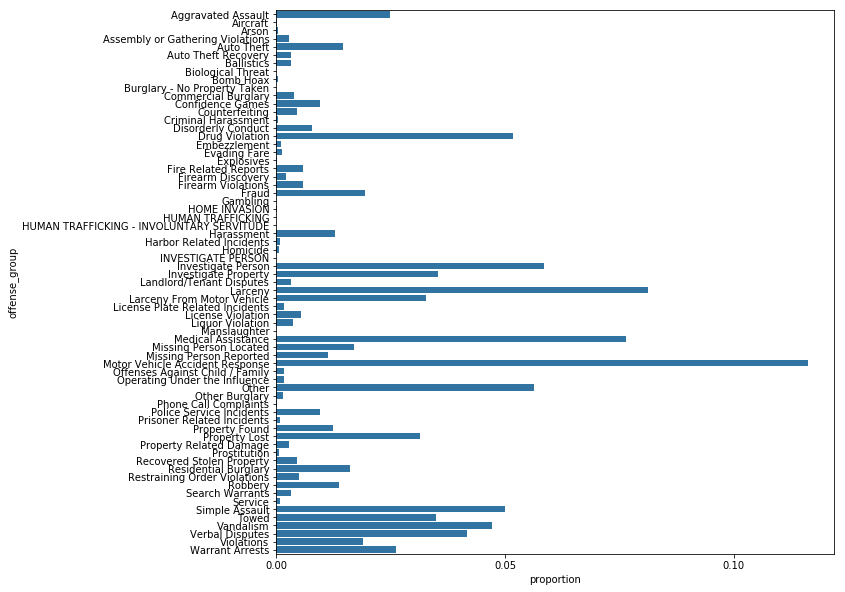

In [53]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['offense_group'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,10])
sb.countplot(data = df, y = 'offense_group', color = base_color)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion')


In [37]:
#max_prop =0.11619121771164508

0.11619121771164508

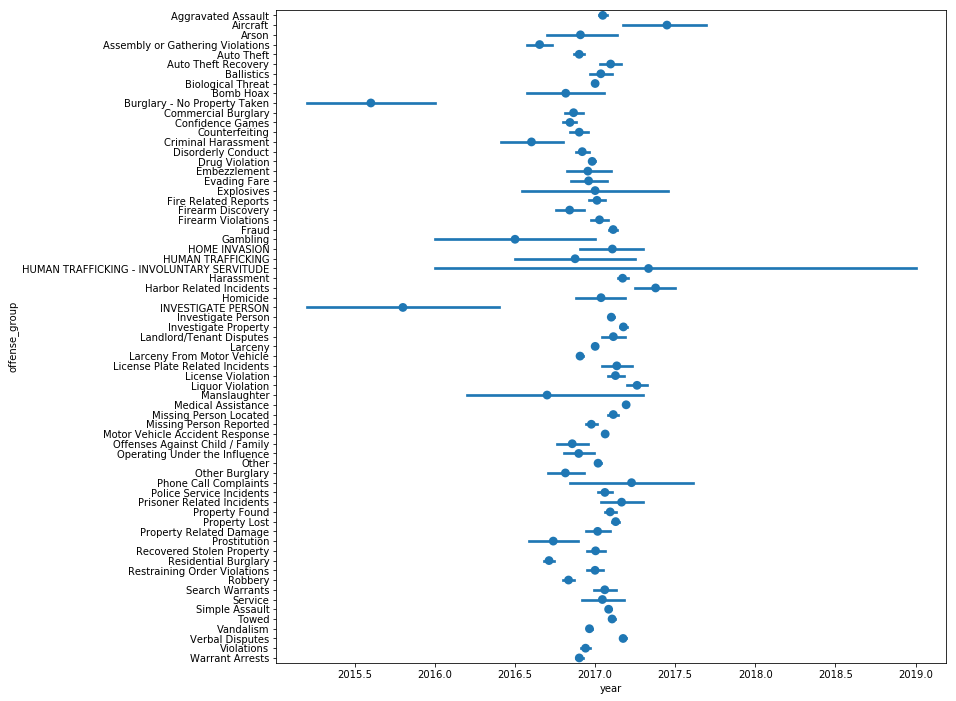

In [58]:
plt.figure(figsize=[12,12])
sb.pointplot(data= df, x='year', y='offense_group', linestyles="")



It appears that the human trafficking has the higest range of incidents occuring between 2016 and 2019?

In [64]:
df.to_csv('crimes.csv')

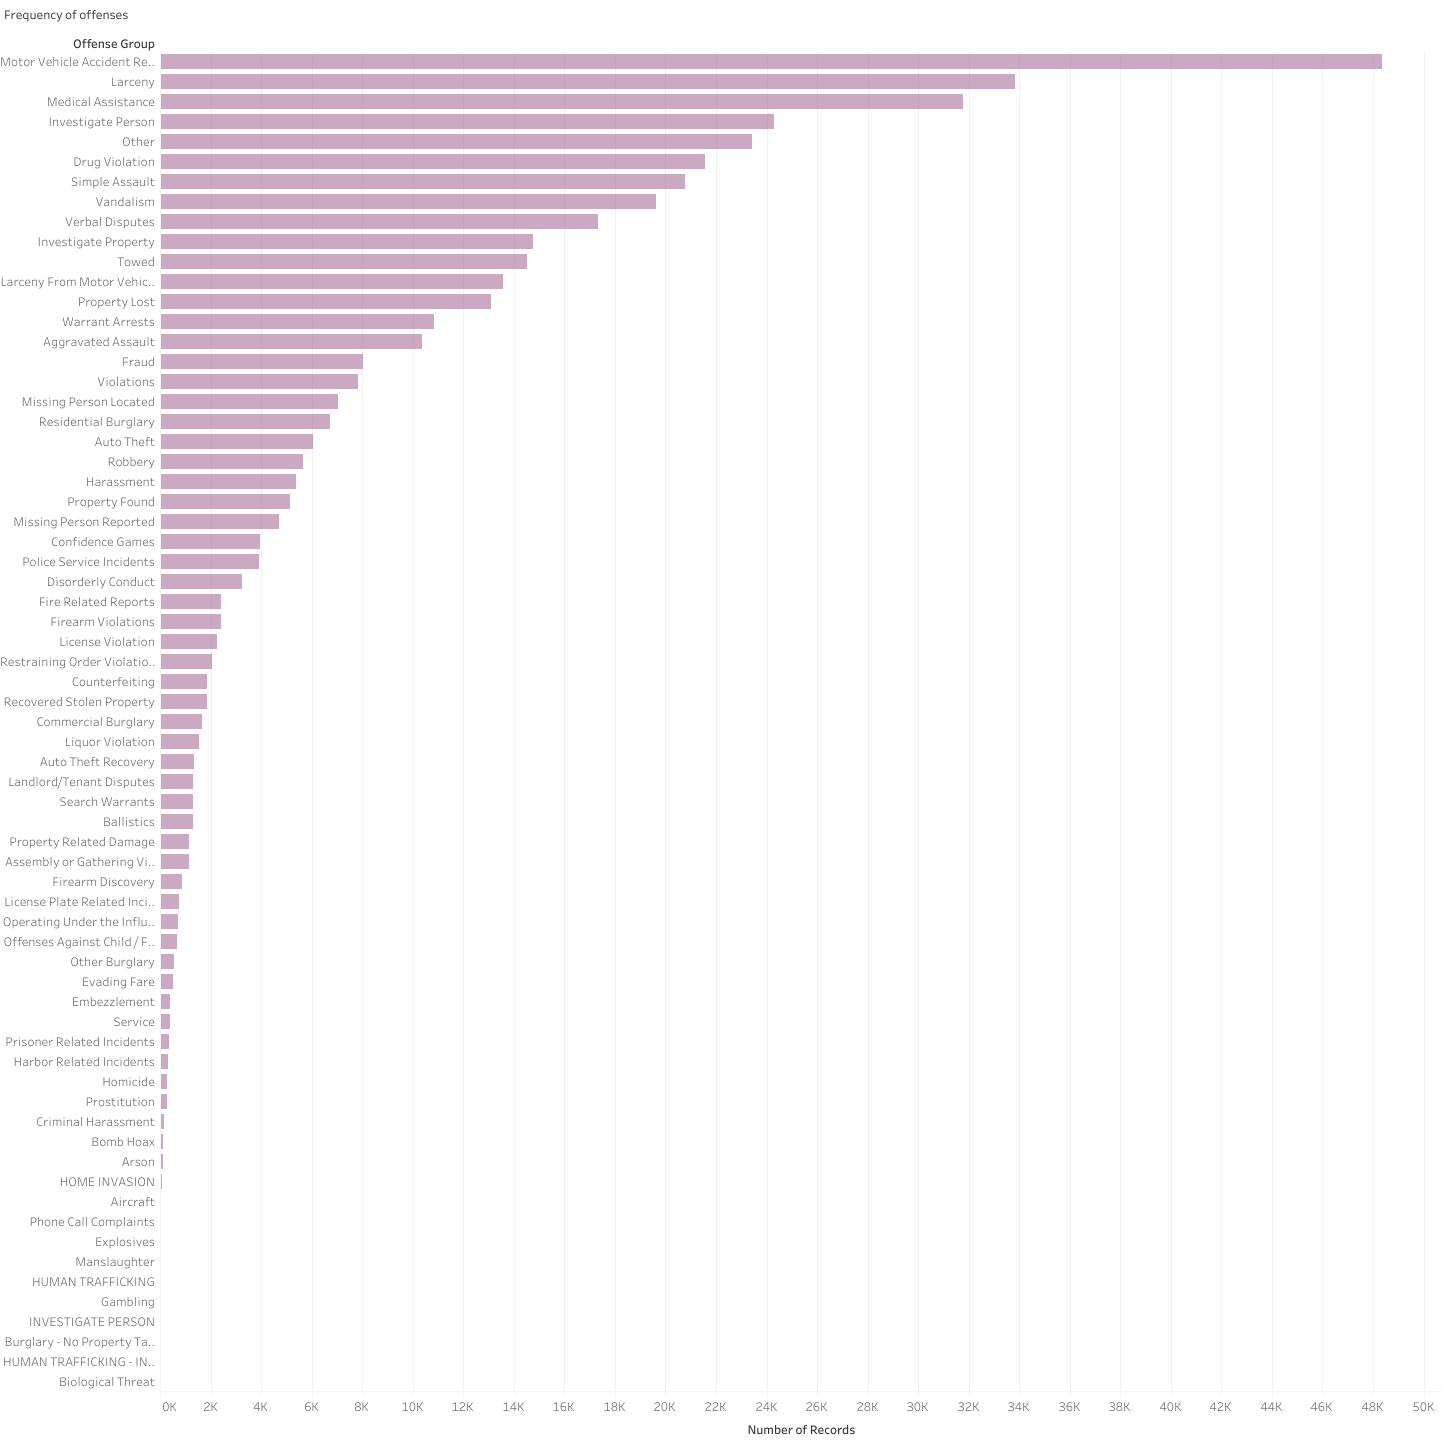

![Alt text](C:/Users/anagh/Downloads/BostoncrimeMap.jpg)

![Alt text](C:/Users/anagh/Downloads/BostoncrimepicHeatmap.jpg)